In [5]:
import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import squarify
import matplotlib.dates as mdates

%matplotlib inline

In [6]:
def read_portfolio(filename):
    df = pd.read_csv(filename)
    
    row = df.iloc[0]
    
    portfolio = {
        'error': row['Error'],
        'weights': json.loads(row['Portfolio Weights']),
        'performance': {
            'train_performance': {
                'tracking_error': row['Train Tracking Error'],
                'root_mean_squared_error': row['Train RMSE'],
                'correlation': row['Train Correlation']
            },
            'test_performance': {
                'tracking_error': row['Test Tracking Error'],
                'root_mean_squared_error': row['Test RMSE'],
                'correlation': row['Test Correlation']
            }
        },
        'optimization_time': row['Optimization Time'],
        'dates': {
            'train': {
                'start': row['Start train'],
                'end': row['End train'],
            },
            'test': {
                'start': row['Start test'],
                'end': row['End test'],
            }
        }
    }
    return portfolio

In [ ]:
import matplotlib.dates as mdates

def plot_portfolio(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    # Seleciona os dados do portfólio
    selected_stocks = stocks_data.columns
    portfolio_data = stocks_data[selected_stocks]

    # Calcula os pesos
    weights = pd.Series(portfolio).reindex(selected_stocks).values

    # Filtra os dados
    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]
    index_data_filtered = index_data.loc[start_date:end_date]

    # Formata as datas para o título
    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')

    # Configuração do gráfico
    fig = plt.figure(figsize=(15, 8), facecolor='black')
    eixo = fig.add_axes([0, 0, 1, 1], facecolor='black')

    # Plotagem
    eixo.plot(index_data_filtered.index, index_data_filtered, color='red', linestyle='-', linewidth=3, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_filtered, color='gold', linestyle='--', linewidth=2, label="Portfolio")

    # Configuração do eixo X para exibir os meses
    eixo.xaxis.set_major_locator(mdates.MonthLocator())  # Localizador de meses
    eixo.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Formato de mês (abreviado)

    # Configurações do gráfico
    eixo.set_title(f"Portfolio {len(portfolio)} stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20, color='white')
    eixo.legend(title="Indicador", loc='upper left', fontsize=15, facecolor='black', edgecolor='white', title_fontsize=15, labelcolor='white')
    eixo.set_ylabel('Normalized Value', fontsize=20, color='white')
    eixo.set_xlabel('Data', fontsize=20, color='white')
    eixo.tick_params(colors='white')
    eixo.grid(color='gray', linestyle='--')

    # Ajusta a exibição das labels no eixo X
    plt.setp(eixo.xaxis.get_majorticklabels(), rotation=45, ha='right', color='white')

    # Exibe o gráfico
    plt.show()


In [52]:
def plot_portfolio_variance(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    # Seleciona os dados do portfólio
    selected_stocks = stocks_data.columns
    portfolio_data = stocks_data[selected_stocks]

    # Calcula os pesos
    weights = pd.Series(portfolio).reindex(selected_stocks).values

    # Filtra os dados para o intervalo desejado
    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]
    print(portfolio_data_filtered)
    index_data_filtered = index_data.loc[start_date:end_date]
    print(index_data_filtered)

    # Formata as datas para o título
    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')

    # Configuração do gráfico
    fig = plt.figure(figsize=(15, 8), facecolor='black')
    eixo = fig.add_axes([0, 0, 1, 1], facecolor='black')

    # Plotagem
    eixo.plot(index_data_filtered.index, index_data_filtered, color='red', linestyle='-', linewidth=1, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_filtered, color='gold', linestyle='-', linewidth=3, label="Portfolio")

    # Configuração do eixo X para exibir os meses
    eixo.xaxis.set_major_locator(mdates.MonthLocator())  # Localizador de meses
    eixo.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Formato de mês (abreviado)

    # Configurações do gráfico
    eixo.set_title(f"Portfolio {len(portfolio)} stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20, color='white')
    eixo.legend(title="Indicador", loc='upper left', fontsize=15, facecolor='black', edgecolor='white', title_fontsize=15, labelcolor='white')
    eixo.set_ylabel('Variance', fontsize=20, color='white')
    eixo.set_xlabel('Data', fontsize=20, color='white')
    eixo.tick_params(colors='white')
    eixo.grid(color='gray', linestyle='--')

    # Ajusta a exibição das labels no eixo X
    plt.setp(eixo.xaxis.get_majorticklabels(), rotation=45, ha='right', color='white')

    # Exibe o gráfico
    plt.show()

In [12]:
def plot_weights(portfolio):
    labels = list(portfolio.keys())
    values = list(portfolio.values())

    colors = plt.cm.autumn([i / len(values) for i in range(len(values))])

    plt.figure(figsize=(12, 8), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    squarify.plot(
        sizes=values,
        label=labels,
        alpha=0.8,
        color=colors,
        text_kwargs={'color': 'white', 'fontsize': 12}
    )

    plt.title(f"Treemap {len(portfolio)} stocks SP100", fontsize=18, color='white', pad=20)
    plt.axis('off')
    plt.show()


In [28]:
# Organizig data
bvsp_index_ticker = '^BVSP'

bvsp_data_values = pd.read_csv('./data/stock_cumulative_returns_^BVSP.csv', index_col=0)  # Inclui o índice
bvsp_data_variance = pd.read_csv('./data/stock_variance_^BVSP.csv', index_col=0)

bvsp_index_values = bvsp_data_values[bvsp_index_ticker]
bvsp_stocks_values = bvsp_data_values.drop(columns=[bvsp_index_ticker])

bvsp_index_variance = bvsp_data_variance[bvsp_index_ticker]
bvsp_stock_variance = bvsp_data_variance.drop(columns=[bvsp_index_ticker])

sp100_index_ticker = '^OEX'

sp100_data_values = pd.read_csv('./data/stock_cumulative_returns_^OEX.csv', index_col=0)  # Inclui o índice
sp100_data_variance = pd.read_csv('./data/stock_variance_^OEX.csv', index_col=0)

sp100_index_values = sp100_data_values[sp100_index_ticker]
sp100_stocks_values = sp100_data_values.drop(columns=[sp100_index_ticker])

sp100_index_variance = sp100_data_variance[sp100_index_ticker]
sp100_stock_variance = sp100_data_variance.drop(columns=[sp100_index_ticker])

start_date_dataset = "2023-01-01"
end_date_dataset = "2024-01-01"
train_start = start_date_dataset
train_end = "2023-03-01"
test_start = "2023-03-02"
test_end = end_date_dataset

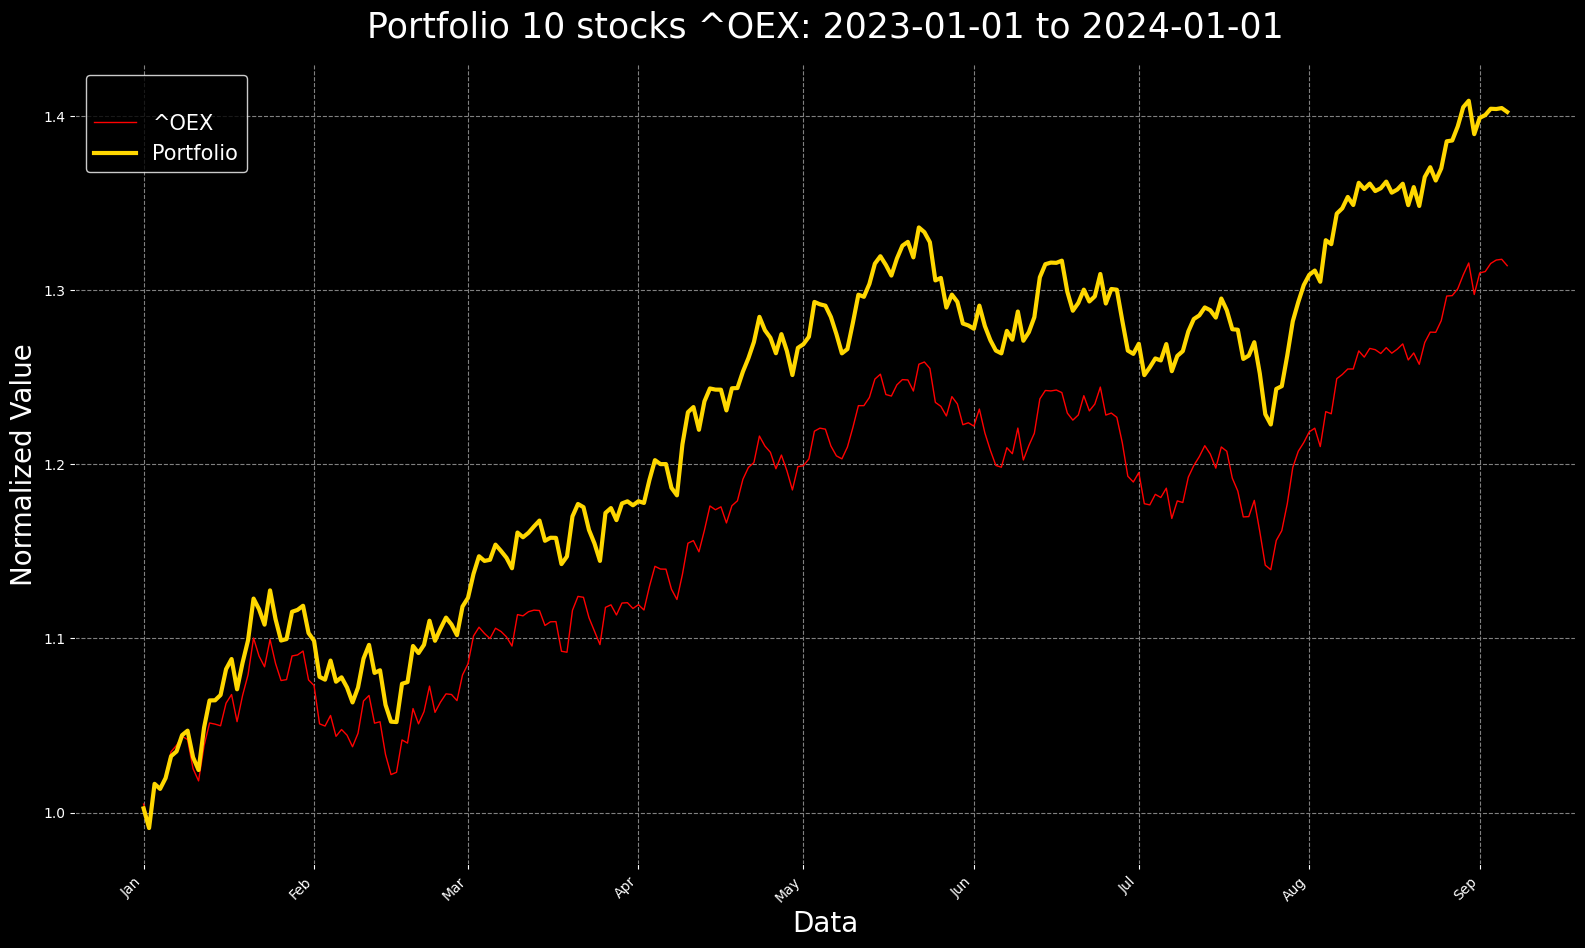

Date
2023-01-04    0.002444
2023-01-05   -0.011426
2023-01-06    0.025538
2023-01-09   -0.002713
2023-01-10    0.006038
                ...   
2023-12-22    0.001685
2023-12-26    0.002502
2023-12-27   -0.000345
2023-12-28    0.000167
2023-12-29   -0.001331
Length: 249, dtype: float64
Date
2023-01-04    0.004900
2023-01-05   -0.011472
2023-01-06    0.021885
2023-01-09   -0.000851
2023-01-10    0.006732
                ...   
2023-12-22    0.000615
2023-12-26    0.003533
2023-12-27    0.001492
2023-12-28    0.000330
2023-12-29   -0.002787
Name: ^OEX, Length: 249, dtype: float64


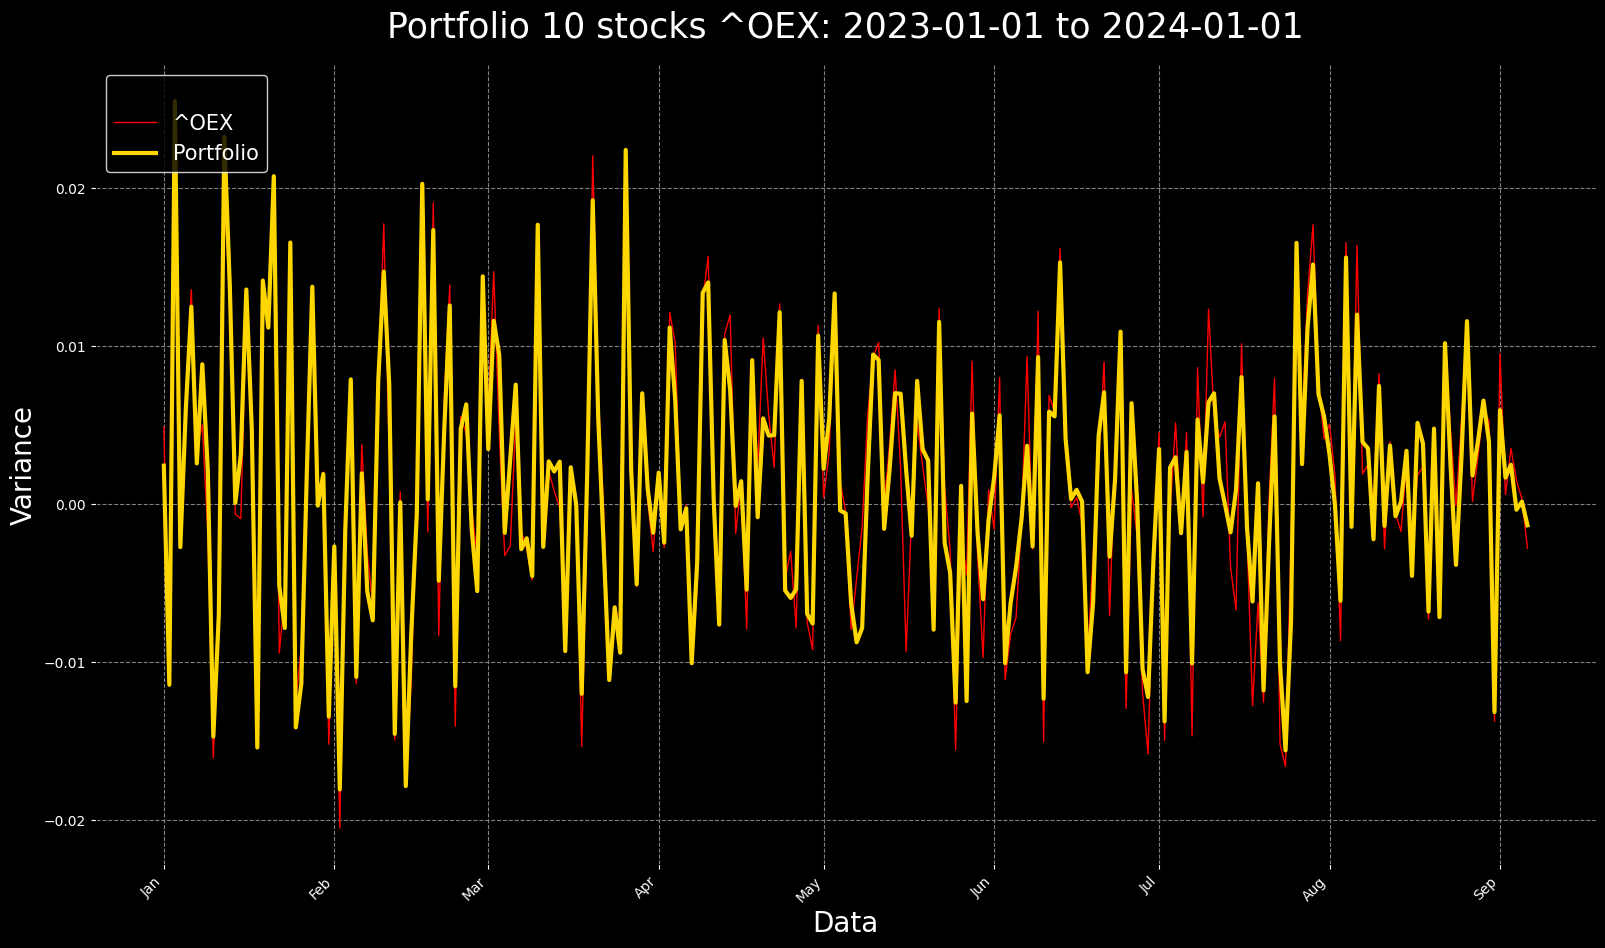

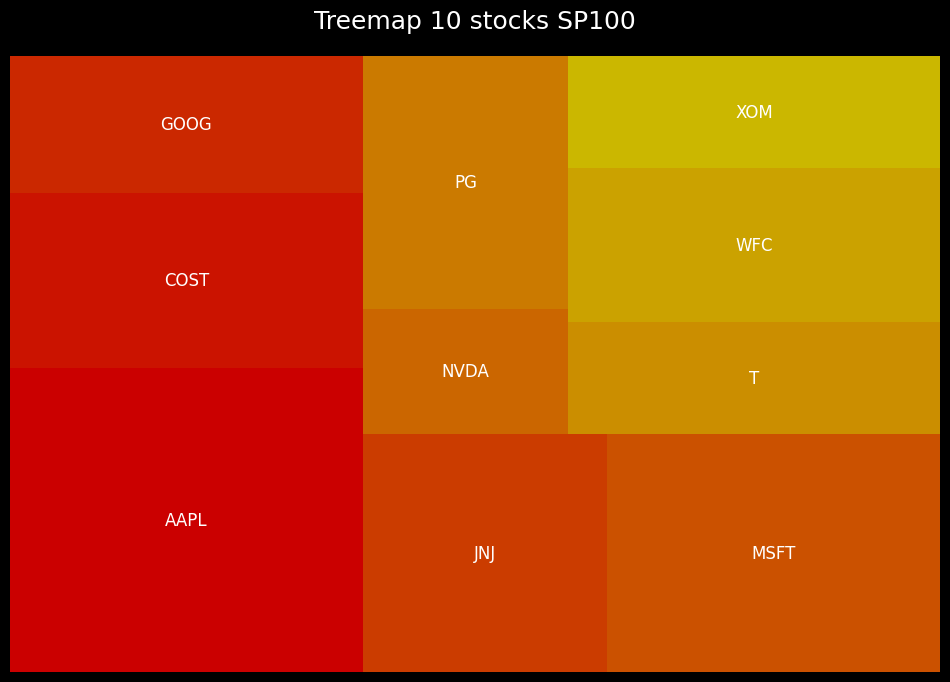

In [53]:
portfolio = read_portfolio("./portfolios/regular_^OEX_10stocks.csv")
plot_portfolio(portfolio['weights'], sp100_stocks_values, sp100_index_values, start_date_dataset, end_date_dataset, sp100_index_ticker)
plot_portfolio_variance(portfolio['weights'], sp100_stock_variance, sp100_index_variance, start_date_dataset, end_date_dataset, sp100_index_ticker)
plot_weights(portfolio['weights'])

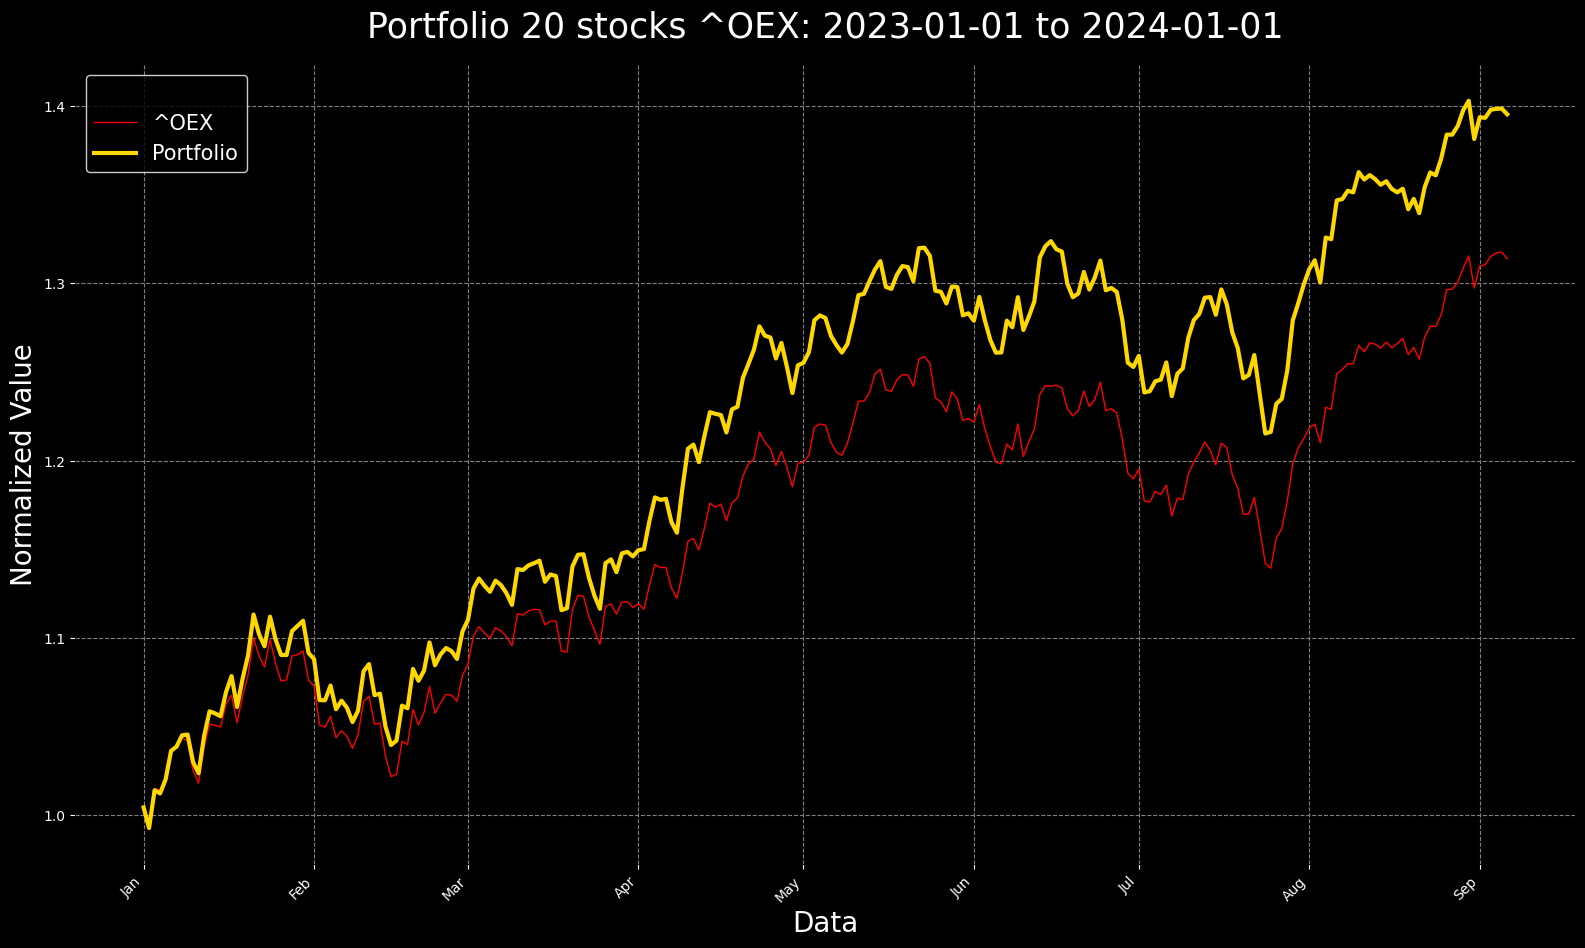

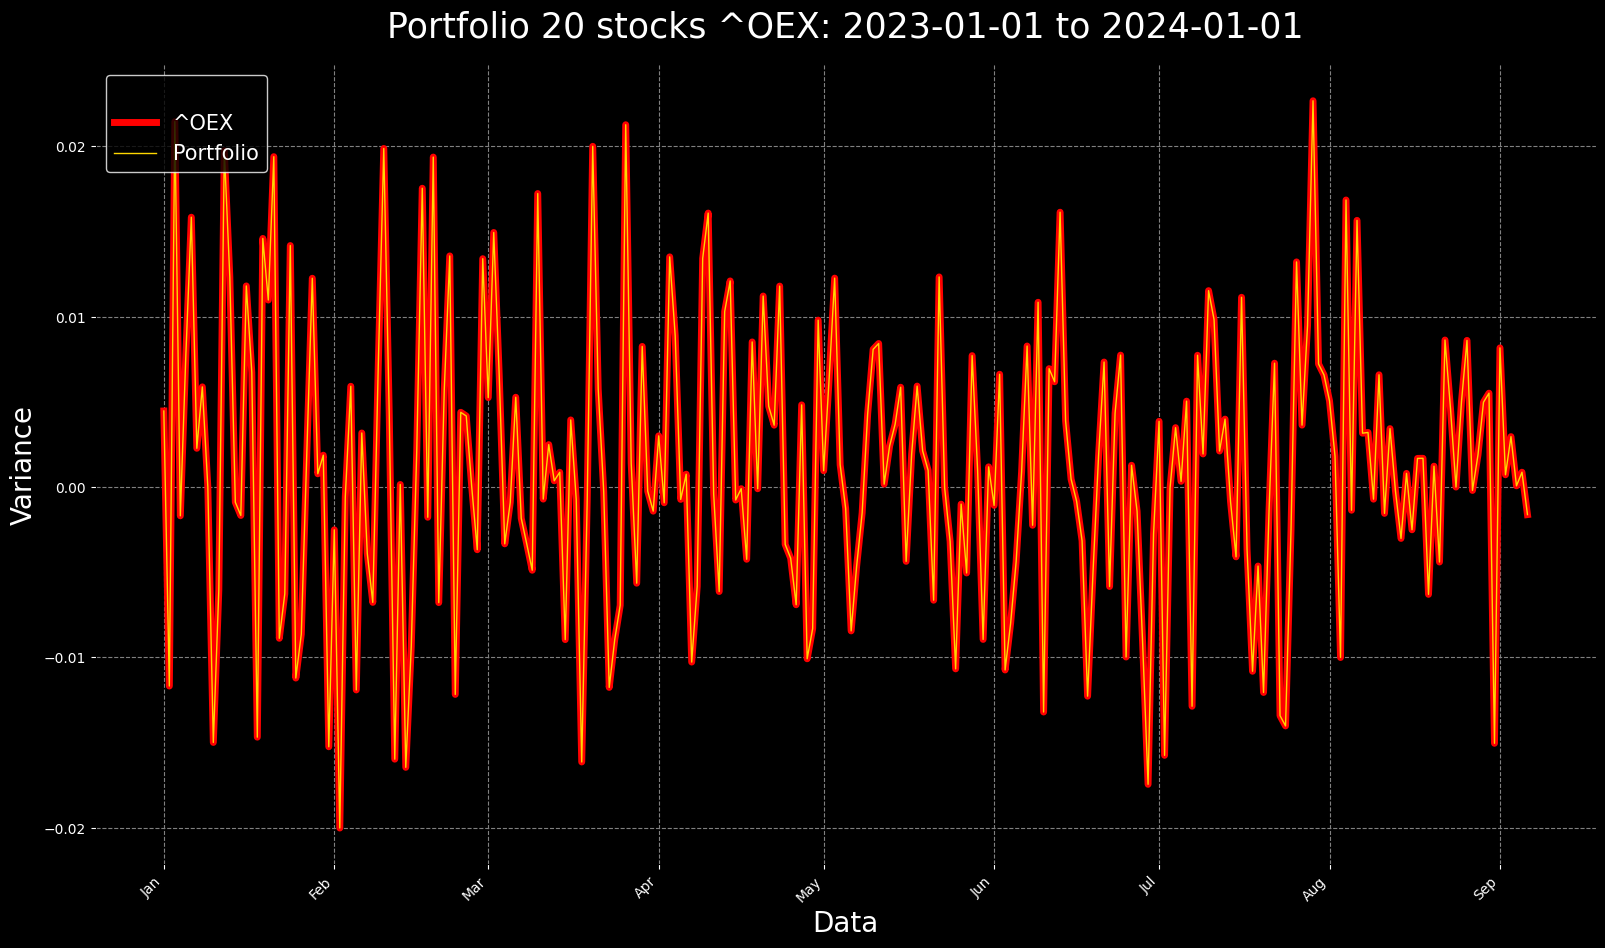

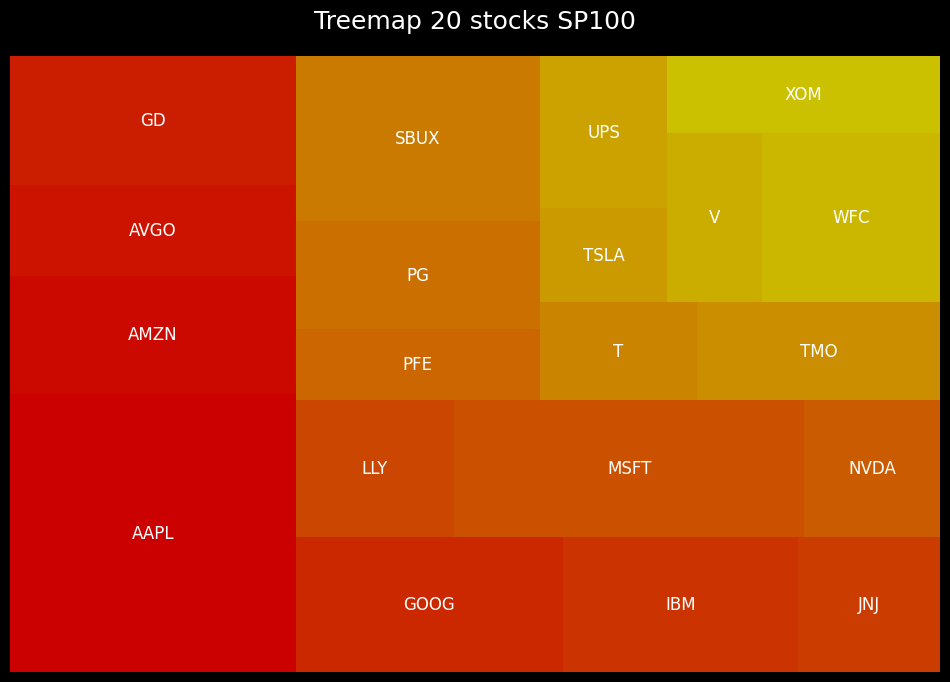

In [43]:
portfolio = read_portfolio("./portfolios/regular_^OEX_20stocks.csv")
plot_portfolio(portfolio['weights'], sp100_stocks_values, sp100_index_values, start_date_dataset, end_date_dataset, sp100_index_ticker)
plot_portfolio_variance(portfolio['weights'], sp100_stock_variance, sp100_index_variance, start_date_dataset, end_date_dataset, sp100_index_ticker)
plot_weights(portfolio['weights'])

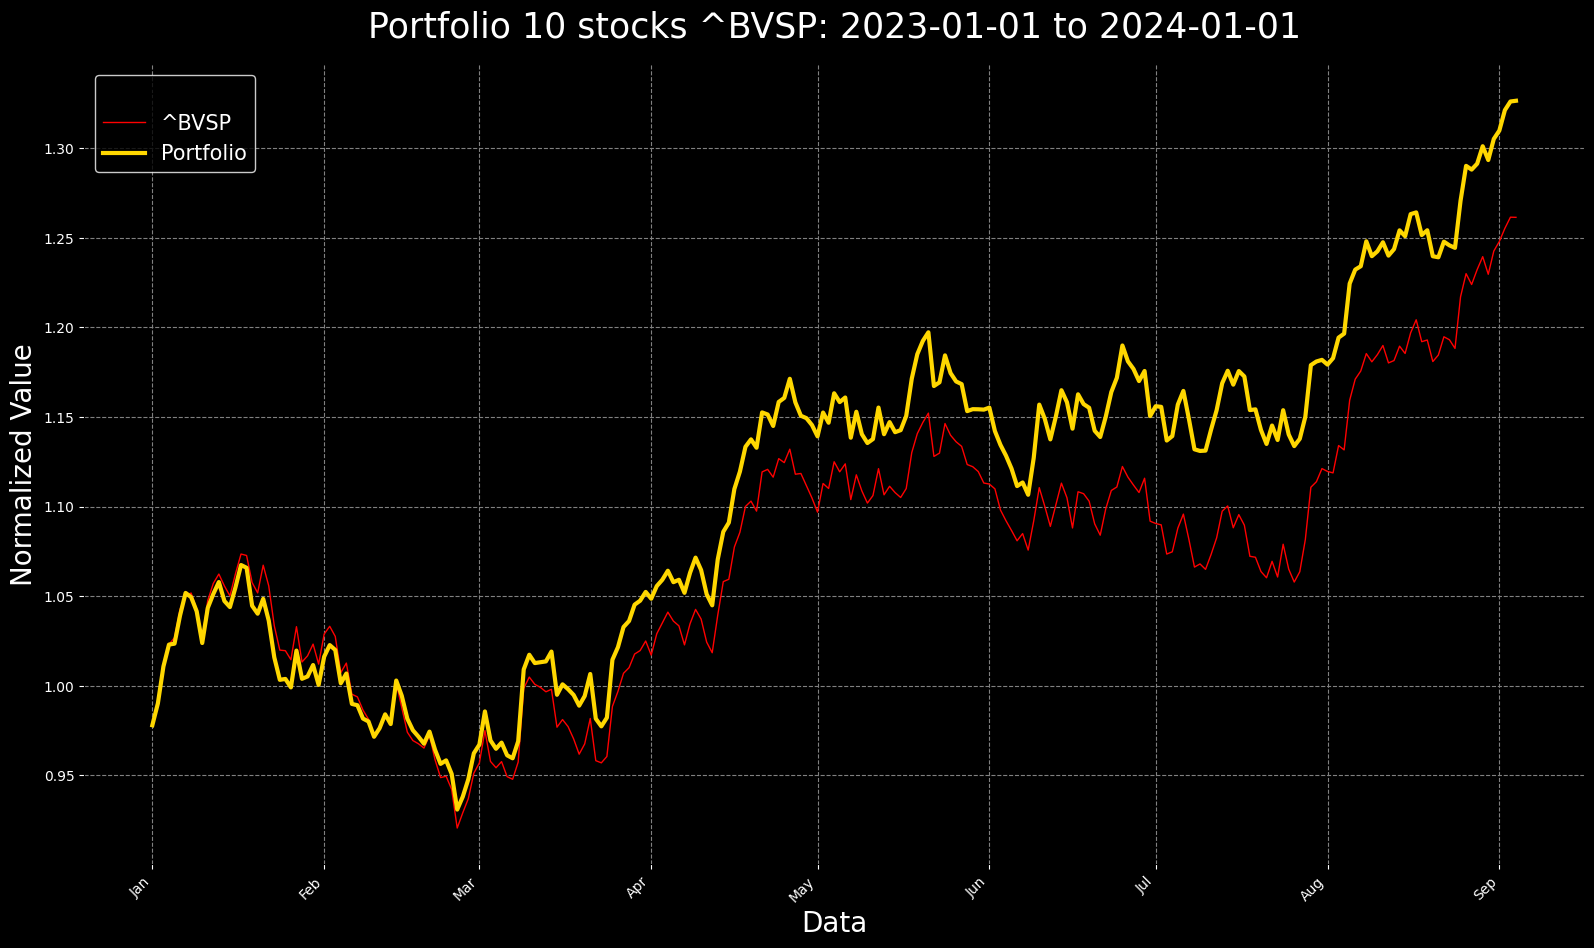

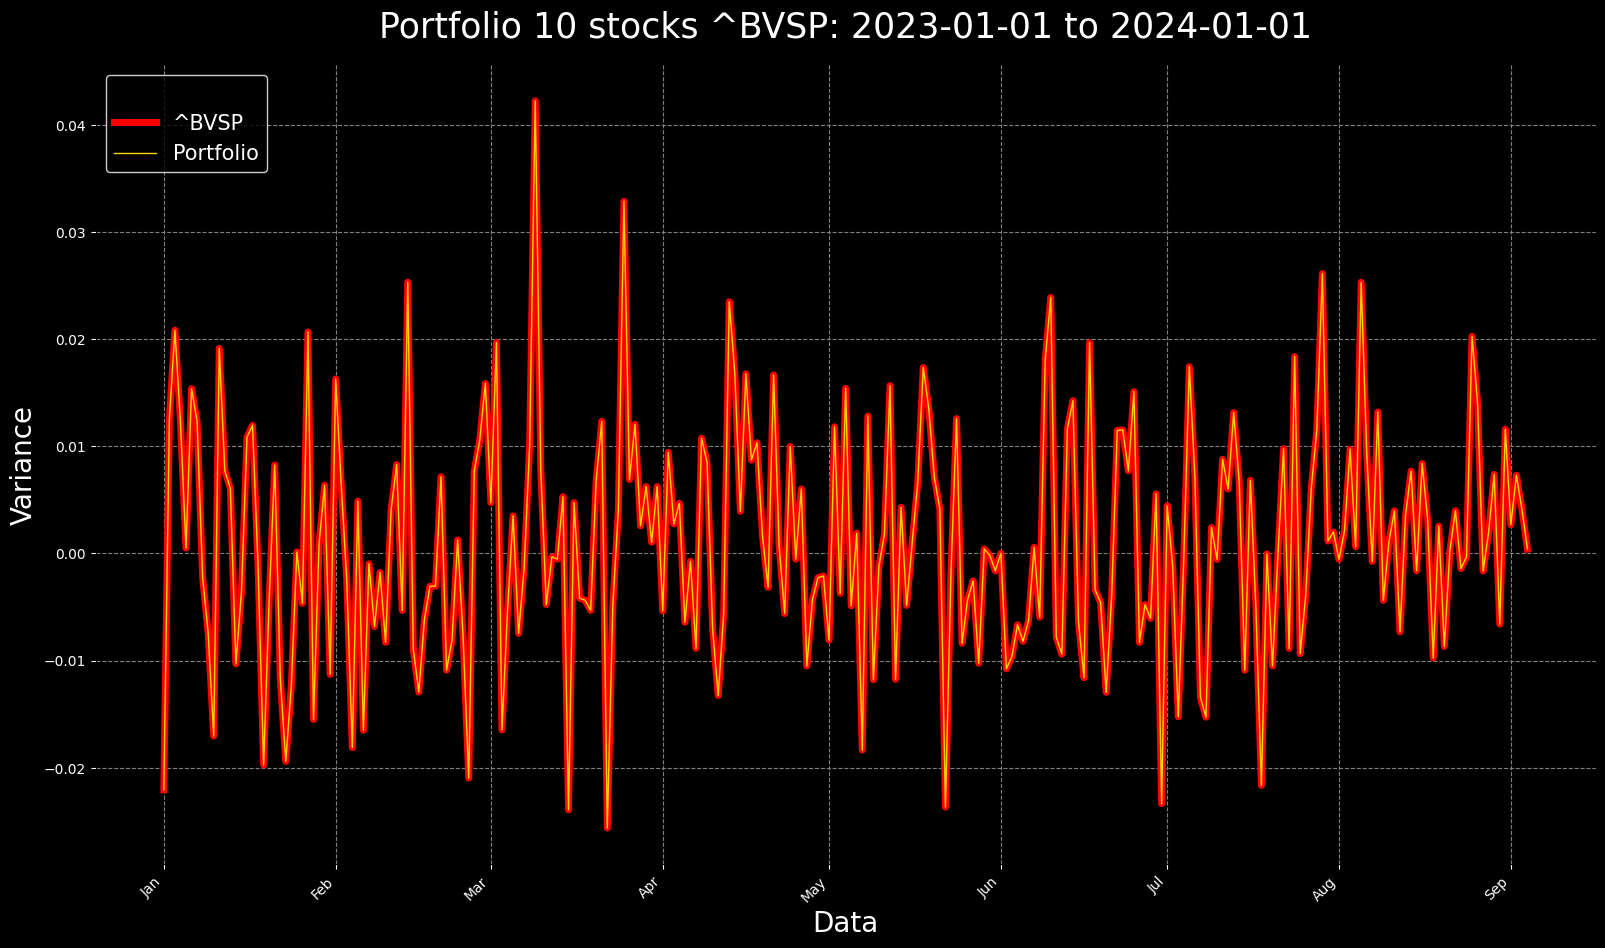

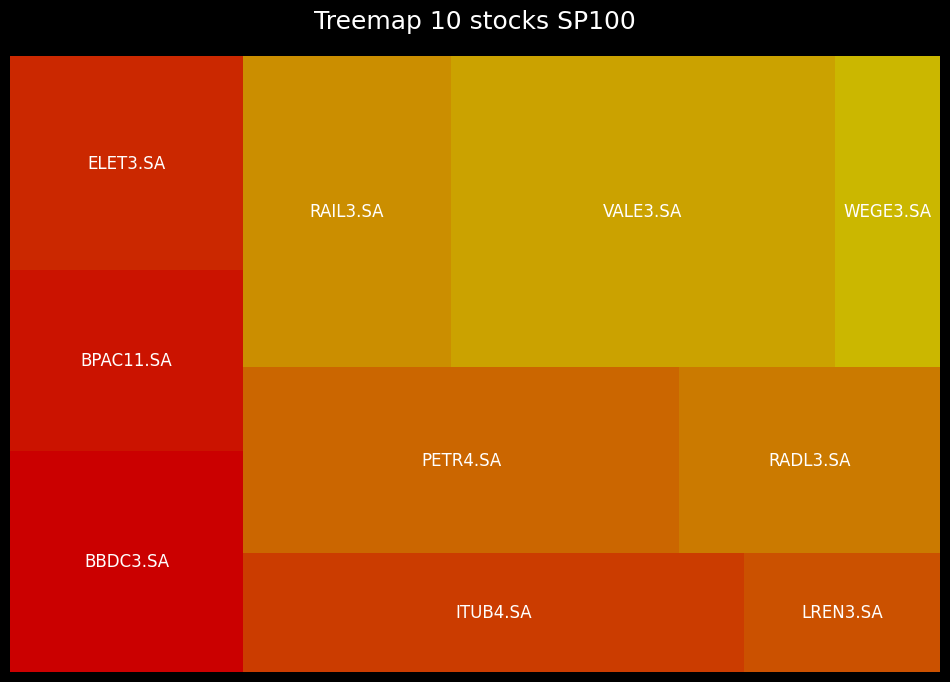

In [44]:
portfolio = read_portfolio("./portfolios/regular_^BVSP_10stocks.csv")
plot_portfolio(portfolio['weights'], bvsp_stocks_values, bvsp_index_values, start_date_dataset, end_date_dataset, bvsp_index_ticker)
plot_portfolio_variance(portfolio['weights'], bvsp_stock_variance, bvsp_index_variance, start_date_dataset, end_date_dataset, bvsp_index_ticker)
plot_weights(portfolio['weights'])

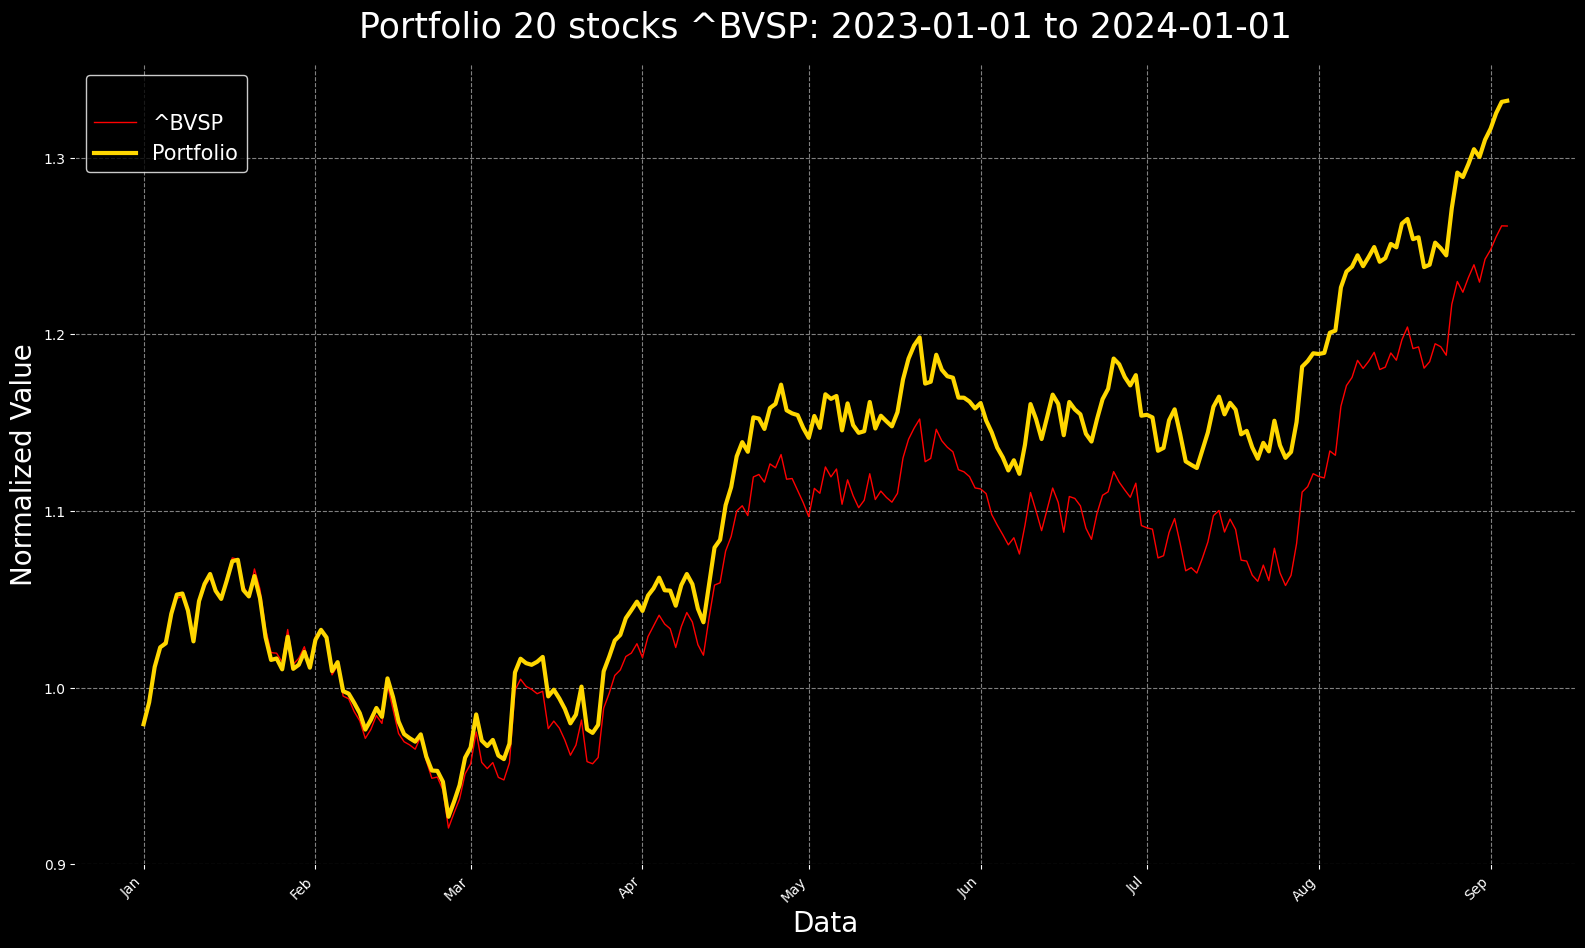

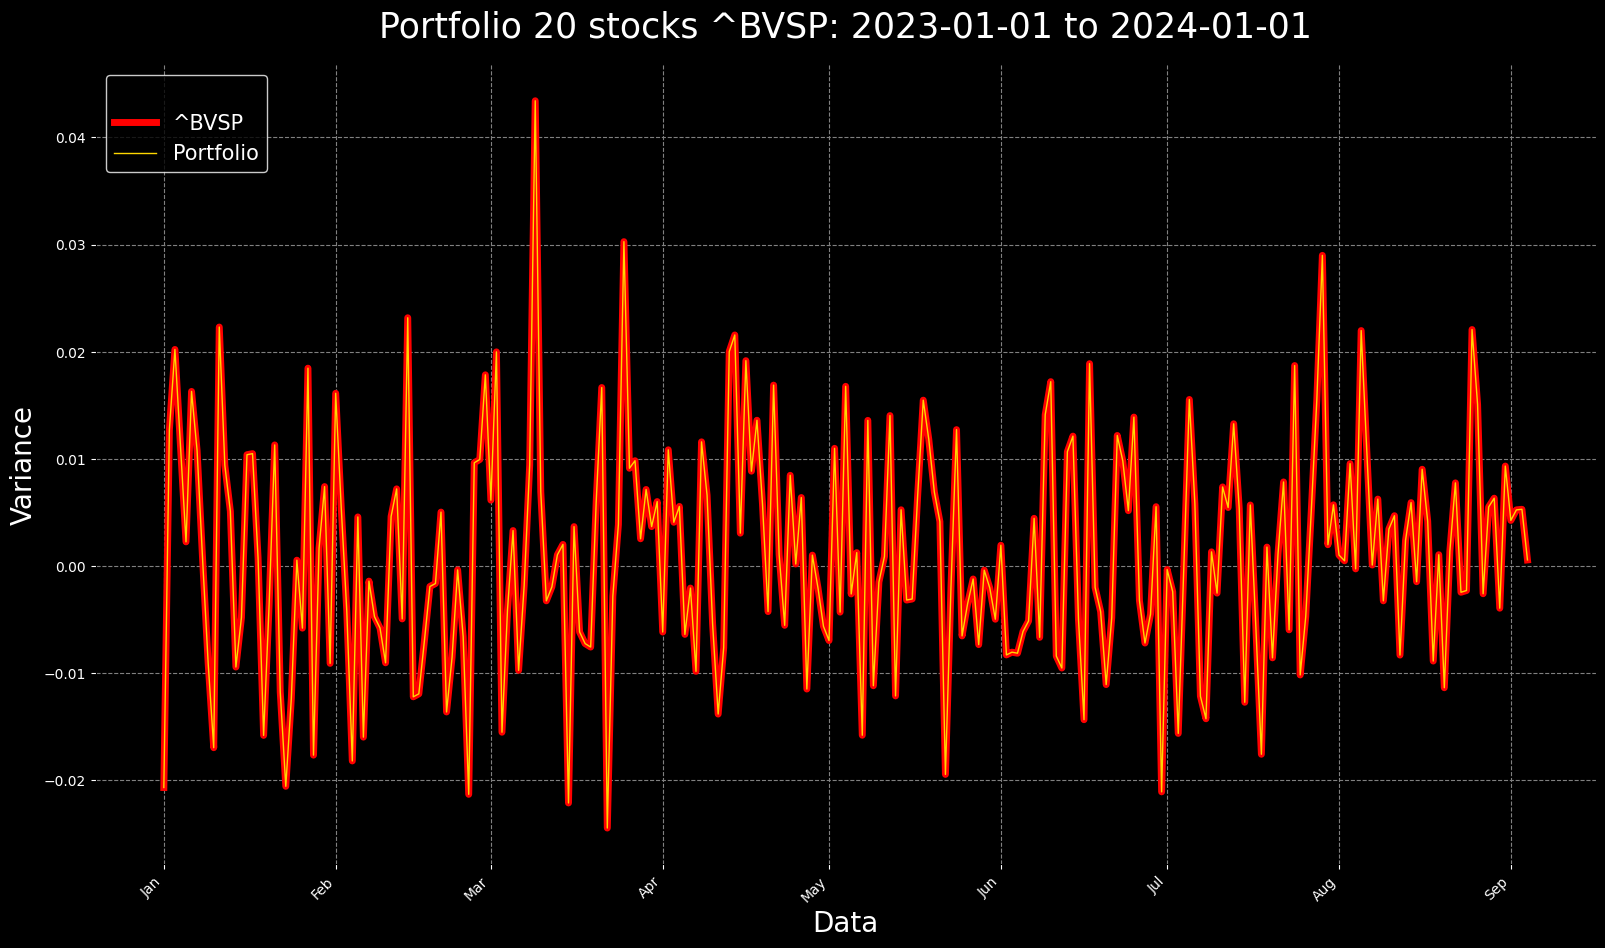

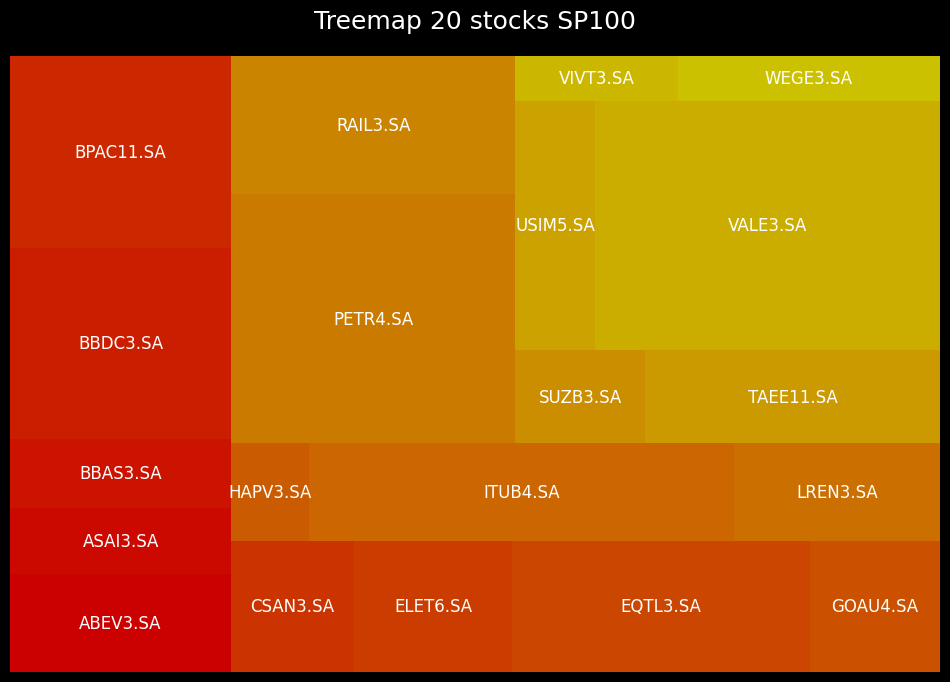

In [45]:
portfolio = read_portfolio("./portfolios/regular_^BVSP_20stocks.csv")
plot_portfolio(portfolio['weights'], bvsp_stocks_values, bvsp_index_values, start_date_dataset, end_date_dataset, bvsp_index_ticker)
plot_portfolio_variance(portfolio['weights'], bvsp_stock_variance, bvsp_index_variance, start_date_dataset, end_date_dataset, bvsp_index_ticker)
plot_weights(portfolio['weights'])